## Predicting the Sales Price of Bulldozers using Machine Learning

Goal of this project is to predict the sale price of bulldozers.

**`Problem Defination`** -> How well we can predict the future sale price of a bulldozer

**`Data`** -> The Data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

**`Features`** -> For the feature of the database go to `Data\bluebook-for-bulldozers\Data Dictionary.xlsx` Relavive path

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

**`Current Target`** RMSLE (root mean squared log error) < 0.23310 

In [2]:
sklearn_1=[
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve the model", 
"6. Save and load a trained model",
"7. Putting it all together"]

## **`visualize the Data`**

In [3]:
# Import training and validation sets TODO: if change file location
df=pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
# Null Columns 
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

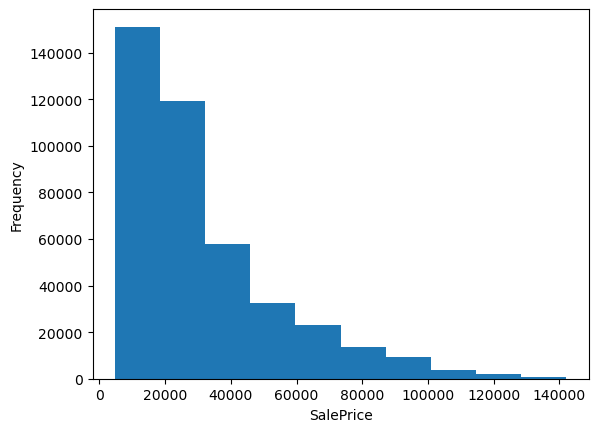

In [6]:
# Visualize data
fig, ax =plt.subplots()
ax.hist(df["SalePrice"])
ax.set_ylabel("Frequency")
ax.set_xlabel("SalePrice");

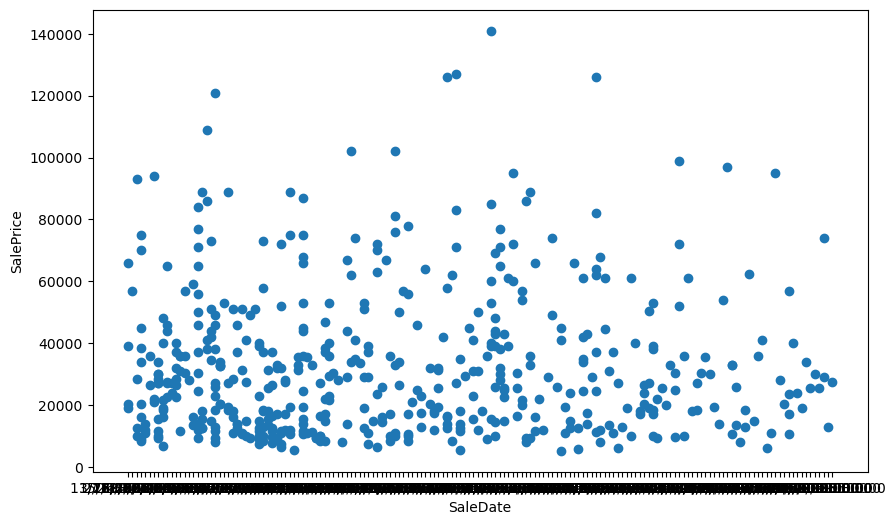

In [7]:
# Visualize data
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(df["saledate"][:500],df["SalePrice"][:500])

ax.set_ylabel("SalePrice")
ax.set_xlabel("SaleDate");

In [8]:
df["saledate"].dtype

dtype('O')

**`Parsing dates`**

In [9]:
df=pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [10]:
df["saledate"].dtype

dtype('<M8[ns]')

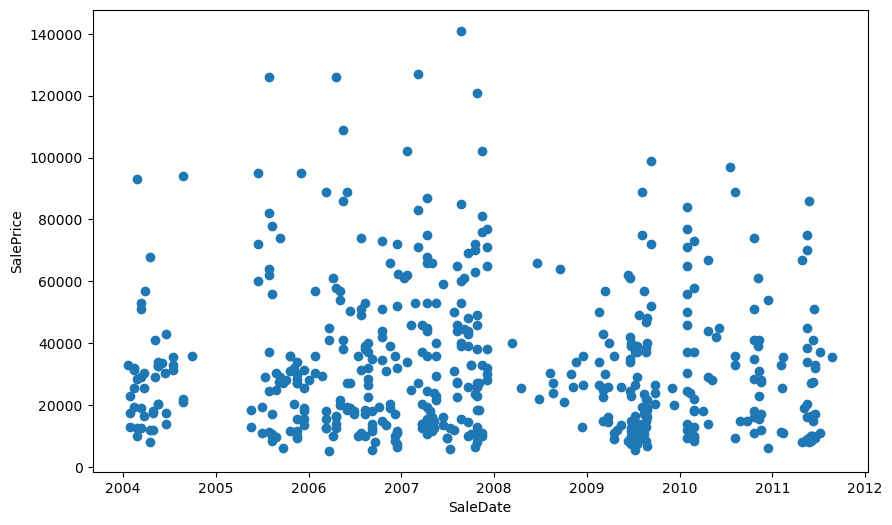

In [11]:
# Visualize data
fig, ax = plt.subplots(figsize=(10,6)) 
ax.scatter(df["saledate"][:500],df["SalePrice"][:500])

ax.set_ylabel("SalePrice")
ax.set_xlabel("SaleDate");

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

## Sort Dataframe by salesdate

In [14]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [15]:
# Make a copy of a DataFrame
df_tmp=df.copy()

Add Datetime parameters for `Saledate` Column

In [16]:
df_tmp["saleYear"]=df_tmp.saledate.dt.year
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"]=df_tmp.saledate.dt.day_of_year

In [17]:
# Removing sale Date column as we have enriched our DataFrame with date time features
df_tmp.drop("saledate",axis=1,inplace=True)

In [18]:
df_tmp.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


## Convert strings to categories
turn all of our data into numbers is by converting them into pandas categories. 

In [19]:
for label,content in df_tmp.items():
    print(content," ",label)
    # if pd.api.types.is_string_dtype(content):
        # print(label)

205615    1646770
274835    1821514
141296    1505138
212552    1671174
62755     1329056
           ...   
410879    6302984
412476    6324811
411927    6313029
407124    6266251
409203    6283635
Name: SalesID, Length: 412698, dtype: int64   SalesID
205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
410879    16000.0
412476     6000.0
411927    16000.0
407124    55000.0
409203    34000.0
Name: SalePrice, Length: 412698, dtype: float64   SalePrice
205615    1126363
274835    1194089
141296    1473654
212552    1327630
62755     1336053
           ...   
410879    1915521
412476    1919104
411927    1918416
407124     509560
409203    1869284
Name: MachineID, Length: 412698, dtype: int64   MachineID
205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124     3357
409203     4701
Name: ModelID, Length: 412698, dtype: int64   ModelID
2056

In [20]:
# This does not work (Not desire result)
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [21]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [22]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered() # convert object into categories

In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [24]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [25]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [26]:
df_tmp.state

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

**`Progress Till Now`**

By the help of pandas categories we have access all our data in the form of numbers.

still there is `missing data`

**`Save Preprocessed Data`**

In [27]:
# Export current tmp dataframe
df_tmp.to_csv("Data/bluebook-for-bulldozers/train_tmp.csv",index=False)

## **`Restart`**

In [28]:
df_tmp=pd.read_csv("Data/bluebook-for-bulldozers/train_tmp.csv",low_memory=False)

## **`Fill Missing Values`**

**`fill numerical value`** 

In [29]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)


SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [30]:
# which column have null values in it
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [31]:
# we will use median to fill missing data in column
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Creating a column at last for future (if needed)
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            # Filling the data
            df_tmp[label]=content.fillna(content.median())

In [32]:
# # check for numeric null columns
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)# No null numeric value

**`filling and turning categorical variables into numbers`**

In [33]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [34]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add column to indicate whether a sample had missing value
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add 1 to them
        df_tmp[label]=pd.Categorical(content).codes+1

In [35]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [36]:
df_tmp.UsageBand.value_counts()

0    339028
3     35832
2     25311
1     12527
Name: UsageBand, dtype: int64

data in numeric done and
missing data handled

## **`Model`**

In [37]:
# %%time
# # checking

# from sklearn.ensemble import RandomForestRegressor 
# #instantiate model
# model=RandomForestRegressor(n_jobs=-1,
#                             random_state=42)

# # Fit the model
# model.fit(df_tmp.drop("SalePrice",axis=1),df["SalePrice"])

In [38]:
# Just Testing
# model.score(df_tmp.drop("SalePrice",axis=1),df["SalePrice"]) # type: ignore

**`Save Preprocessed Data`**

In [39]:
# Export current tmp dataframe
df_tmp.to_csv("Data/bluebook-for-bulldozers/train_tmp_1.csv",index=False)

# **`Restart`**

In [40]:
df_tmp=pd.read_csv("Data/bluebook-for-bulldozers/train_tmp_1.csv",low_memory=False)

In [41]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int64(54)
memory usage: 197.6 MB


## Splitting data into train/validation sets

In [42]:
# TODO: simple import valid.csv and train set

In [43]:
# Split data into training and validation
df_val=df_tmp[df_tmp["saleYear"]==2012]
df_train=df_tmp[df_tmp["saleYear"]!=2012]
len(df_val),len(df_train)

(11573, 401125)

In [44]:
# split data into x & y
x_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
x_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]

# Just check if any error
x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building a evaluation Function

In [45]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_log_error  # type: ignore

def rmsle(y_test,y_preds):

    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_score(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_valid)
    scores={
        "training MAE": mean_absolute_error(y_train,train_preds),
        "Valid MAE": mean_absolute_error(y_valid,val_preds),
        "Training RMSLE": rmsle(y_train,train_preds),
        "valid RSMLE": rmsle(y_valid,val_preds),
        "Training R^2": r2_score(y_train,train_preds),
        "Valid R^2": r2_score(y_valid,val_preds)
    }
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [46]:
# from sklearn.ensemble import RandomForestRegressor # type: ignore
# model=RandomForestRegressor(n_estimators=100,
#                             n_jobs=-1,
#                             max_samples=10000,
#                             random_state=42)

In [47]:
# %%time
# model.fit(x_train,y_train)

In [48]:
# show_score(model)

## Hyperparameter tuning with RandomSearchCV

In [49]:
# %%time
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# # Different RandomForestRegressor hyperparameters

# rf_grid={
#     "n_estimators" : np.arange(10,100,10),
#     "max_depth" : [None,3,5,10],
#     "min_samples_split":np.arange(2,20,2),
#     "min_samples_leaf":np.arange(1,20,2),
#     "max_features": [0.5,1,"sqrt","log2"],
#     "max_samples" : [10000]
# }

# # Instantiate RandomSearchCV model
# rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
#                                                     random_state=42),
#                                 param_distributions=rf_grid,
#                                 n_iter=100,
#                                 cv=5,
#                                 verbose=True)

# # Fit the RandomizedSearchCV model
# rs_model.fit(x_train,y_train)

In [50]:
# rs_model.best_params_

In [51]:
# show_score(rs_model)

## Train a model with best hyperparameters

`NOTE:`These were found after 100 iterations of RandomizedSearchCV

In [52]:
%%time
from sklearn.ensemble import RandomForestRegressor 
# Most ideal hyperparameters i have found
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)
# Fit the ideal model
ideal_model.fit(x_train,y_train)

CPU times: total: 5min 32s
Wall time: 38.7 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [53]:
show_score(ideal_model) # type: ignore

{'training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'valid RSMLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [ ]:
# %%time
# from sklearn.ensemble import RandomForestRegressor 
# # Most ideal hyperparameters i have found
# ideal_model_1 = RandomForestRegressor(n_estimators= 90,
#                                         min_samples_split= 12,
#                                         min_samples_leaf= 1,
#                                         max_samples= None,
#                                         max_features= 0.5,
#                                         max_depth= None,
#                                         n_jobs=-1,
#                                         random_state=42)
# # Fit the ideal model
# ideal_model_1.fit(x_train,y_train)

CPU times: total: 12min 37s
Wall time: 1min 18s


RandomForestRegressor(max_features=0.5, min_samples_split=12, n_estimators=90,
                      n_jobs=-1, random_state=42)

In [ ]:
# show_score(ideal_model_1) # type: ignore

{'training MAE': 2763.5184915007308,
 'Valid MAE': 5925.509135306483,
 'Training RMSLE': 0.1364797448520384,
 'valid RSMLE': 0.24540936555136125,
 'Training R^2': 0.9638283284199487,
 'Valid R^2': 0.8831474419156874}

## Make Predictions on test data

In [56]:
# import test data
df_test=pd.read_csv("Data/bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=["saledate"])

In [57]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


Preprocessing the test data 

In [58]:
def preprocess_data(df):
    """Performs transformations on df and returns transformed df"""
    df["saleYear"]=df.saledate.dt.year
    df["saleMonth"]=df.saledate.dt.month
    df["saleDay"]=df.saledate.dt.day
    df["saleDayOfWeek"]=df.saledate.dt.day_of_week
    df["saleDayOfYear"]=df.saledate.dt.day_of_year    

    df.drop("saledate",axis=1,inplace=True)
    
    # we will use median to fill missing data in column
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Creating a column at last for future (if needed)
                df[label+"_is_missing"]=pd.isnull(content)
                # Filling the data
                df[label]=content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]=pd.isnull(content)
            df[label]=pd.Categorical(content).codes+1
    return df

In [59]:
df_test=preprocess_data(df_test)

In [60]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [61]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [62]:
# so the test and train data is of not same shape
#to see which column is missing
set(x_train.columns)-set(df_test.columns) #auctioneerID_is_missing column is missing

{'auctioneerID_is_missing'}

In [63]:
df_test["auctioneerID_is_missing"]=False # adding AuctioneerID_is_missing
df_test = df_test.reindex(columns=list(x_train.columns)) # rearanging the columns 

In [64]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


Finally now our test dataframe has same features as our training dataframe, so let start with predictions

In [65]:
# Make predictions on test data
test_preds=ideal_model.predict(df_test)# type: ignore

In [66]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

In [67]:
# creating it in formate saleid saleprice
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["salePrice"]=test_preds
df_preds.head(10)

,SalesID,salePrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
5,1227870,29873.231696
6,1227871,26638.711081
7,1227879,12727.237216
8,1227880,16154.715120
9,1227881,34470.409058


In [68]:
df_preds.to_csv("Data/bluebook-for-bulldozers/test_predictions.csv",index=False)

## Feature Importance

Feature importance seeks to figure out which different attributes of data were most importance when it comes to predicting the target variable(salePrice)

In [69]:
ideal_model.feature_importances_  # type: ignore

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [70]:
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({"features":columns,
                        "features_importances" :importances})
            .sort_values("features_importances",ascending=False)
            .reset_index(drop=True))
    #plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["features_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features importance")
    ax.invert_yaxis();

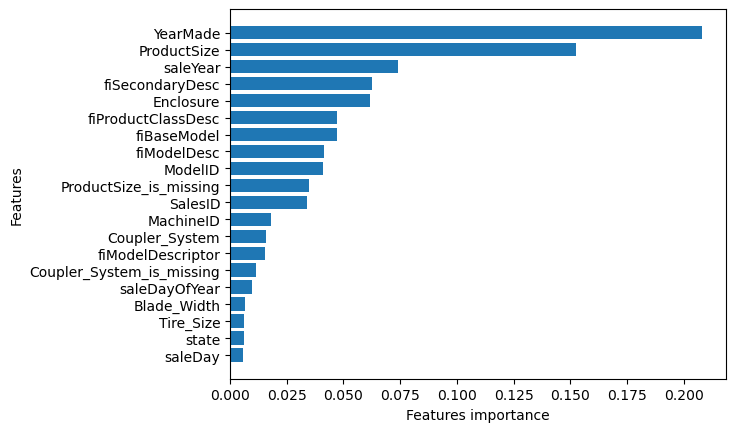

In [71]:
plot_features(x_train.columns,ideal_model.feature_importances_) # type: ignore